# smartphone addiction

## Discription:
The study aims to assess prevalence of smartphone addiction symptoms, and to ascertain whether depression or anxiety, independently, contributes to smartphone addiction level among a sample of Lebanese university students, while adjusting simultaneously for important sociodemographic, academic, lifestyle, personality trait, and smartphone-related variables.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

4.14.3


### Exploring the Data

In [2]:
df = pd.read_csv('final dataset.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 14 columns):
Prsnlty_type                        266 non-null int64
HrsSmrtPhnUse_Wkday                 266 non-null int64
CallFamMem                          266 non-null int64
CallFrnds                           266 non-null int64
Txtng                               266 non-null int64
Entertainment                       266 non-null int64
NgtvePhysHlthEffcts_SmrtPhnUse      266 non-null int64
DcreasdSlpTimeQulty_SmrtPhnUse      266 non-null int64
TiredDaytime_latenightSmrtPhnUse    266 non-null int64
Compulsive_Behavior                 266 non-null int64
Functional_Impairment               266 non-null int64
TotAddiction_Score                  266 non-null int64
Depression_score                    266 non-null int64
Anxiety_score                       266 non-null int64
dtypes: int64(14)
memory usage: 29.2 KB


In [4]:
df.head()

,Prsnlty_type,HrsSmrtPhnUse_Wkday,CallFamMem,CallFrnds,Txtng,Entertainment,NgtvePhysHlthEffcts_SmrtPhnUse,DcreasdSlpTimeQulty_SmrtPhnUse,TiredDaytime_latenightSmrtPhnUse,Compulsive_Behavior,Functional_Impairment,TotAddiction_Score,Depression_score,Anxiety_score
0,1,1,1,1,1,1,2,2,3,25,17,63,1,2
1,0,1,1,1,1,1,1,1,2,17,12,45,2,2
2,0,1,1,1,1,1,2,2,3,20,19,59,1,1
3,0,1,0,1,1,1,3,3,3,27,22,74,1,0
4,0,1,0,0,1,1,3,2,1,22,12,56,0,0


In [5]:
df['CallFamMem'] = df['CallFamMem']+df['CallFrnds']+df['Txtng']

In [6]:
df = df.rename(columns={'CallFamMem': 'Socializing'})

In [7]:
df.drop('CallFrnds',axis=1,inplace=True)

In [8]:
df.drop('Txtng',axis=1,inplace=True)

In [9]:
df.head()

,Prsnlty_type,HrsSmrtPhnUse_Wkday,Socializing,Entertainment,NgtvePhysHlthEffcts_SmrtPhnUse,DcreasdSlpTimeQulty_SmrtPhnUse,TiredDaytime_latenightSmrtPhnUse,Compulsive_Behavior,Functional_Impairment,TotAddiction_Score,Depression_score,Anxiety_score
0,1,1,3,1,2,2,3,25,17,63,1,2
1,0,1,3,1,1,1,2,17,12,45,2,2
2,0,1,3,1,2,2,3,20,19,59,1,1
3,0,1,2,1,3,3,3,27,22,74,1,0
4,0,1,1,1,3,2,1,22,12,56,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 12 columns):
Prsnlty_type                        266 non-null int64
HrsSmrtPhnUse_Wkday                 266 non-null int64
Socializing                         266 non-null int64
Entertainment                       266 non-null int64
NgtvePhysHlthEffcts_SmrtPhnUse      266 non-null int64
DcreasdSlpTimeQulty_SmrtPhnUse      266 non-null int64
TiredDaytime_latenightSmrtPhnUse    266 non-null int64
Compulsive_Behavior                 266 non-null int64
Functional_Impairment               266 non-null int64
TotAddiction_Score                  266 non-null int64
Depression_score                    266 non-null int64
Anxiety_score                       266 non-null int64
dtypes: int64(12)
memory usage: 25.0 KB


In [11]:
df.columns

Index(['Prsnlty_type', 'HrsSmrtPhnUse_Wkday', 'Socializing', 'Entertainment',
       'NgtvePhysHlthEffcts_SmrtPhnUse', 'DcreasdSlpTimeQulty_SmrtPhnUse',
       'TiredDaytime_latenightSmrtPhnUse', 'Compulsive_Behavior',
       'Functional_Impairment', 'TotAddiction_Score', 'Depression_score',
       'Anxiety_score'],
      dtype='object')

In [12]:
df.tail()

,Prsnlty_type,HrsSmrtPhnUse_Wkday,Socializing,Entertainment,NgtvePhysHlthEffcts_SmrtPhnUse,DcreasdSlpTimeQulty_SmrtPhnUse,TiredDaytime_latenightSmrtPhnUse,Compulsive_Behavior,Functional_Impairment,TotAddiction_Score,Depression_score,Anxiety_score
261,0,1,1,1,2,3,2,29,19,76,2,3
262,1,1,3,1,1,2,1,20,16,58,6,1
263,1,0,3,1,3,2,2,25,18,71,2,3
264,1,1,3,1,3,2,1,18,11,52,2,1
265,0,0,3,1,1,1,1,9,8,29,1,2


In [13]:
df.describe()

,Prsnlty_type,HrsSmrtPhnUse_Wkday,Socializing,Entertainment,NgtvePhysHlthEffcts_SmrtPhnUse,DcreasdSlpTimeQulty_SmrtPhnUse,TiredDaytime_latenightSmrtPhnUse,Compulsive_Behavior,Functional_Impairment,TotAddiction_Score,Depression_score,Anxiety_score
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,0.364662,0.819549,2.184211,0.736842,2.154135,2.195489,2.090226,18.936090,16.642857,56.022556,1.778195,1.973684
std,0.482242,0.385288,1.049661,0.441177,0.976479,0.872720,0.927229,5.585667,5.039119,15.002624,1.237639,1.444333
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,9.000000,8.000000,26.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,15.000000,13.000000,45.250000,1.000000,1.000000
50%,0.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,19.000000,17.000000,57.000000,2.000000,2.000000
75%,1.000000,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000,23.000000,20.000000,66.000000,2.000000,3.000000
max,1.000000,1.000000,3.000000,1.000000,4.000000,4.000000,4.000000,36.000000,32.000000,102.000000,6.000000,6.000000


In [14]:
df.columns

Index(['Prsnlty_type', 'HrsSmrtPhnUse_Wkday', 'Socializing', 'Entertainment',
       'NgtvePhysHlthEffcts_SmrtPhnUse', 'DcreasdSlpTimeQulty_SmrtPhnUse',
       'TiredDaytime_latenightSmrtPhnUse', 'Compulsive_Behavior',
       'Functional_Impairment', 'TotAddiction_Score', 'Depression_score',
       'Anxiety_score'],
      dtype='object')

# Exploratory Data Analysis

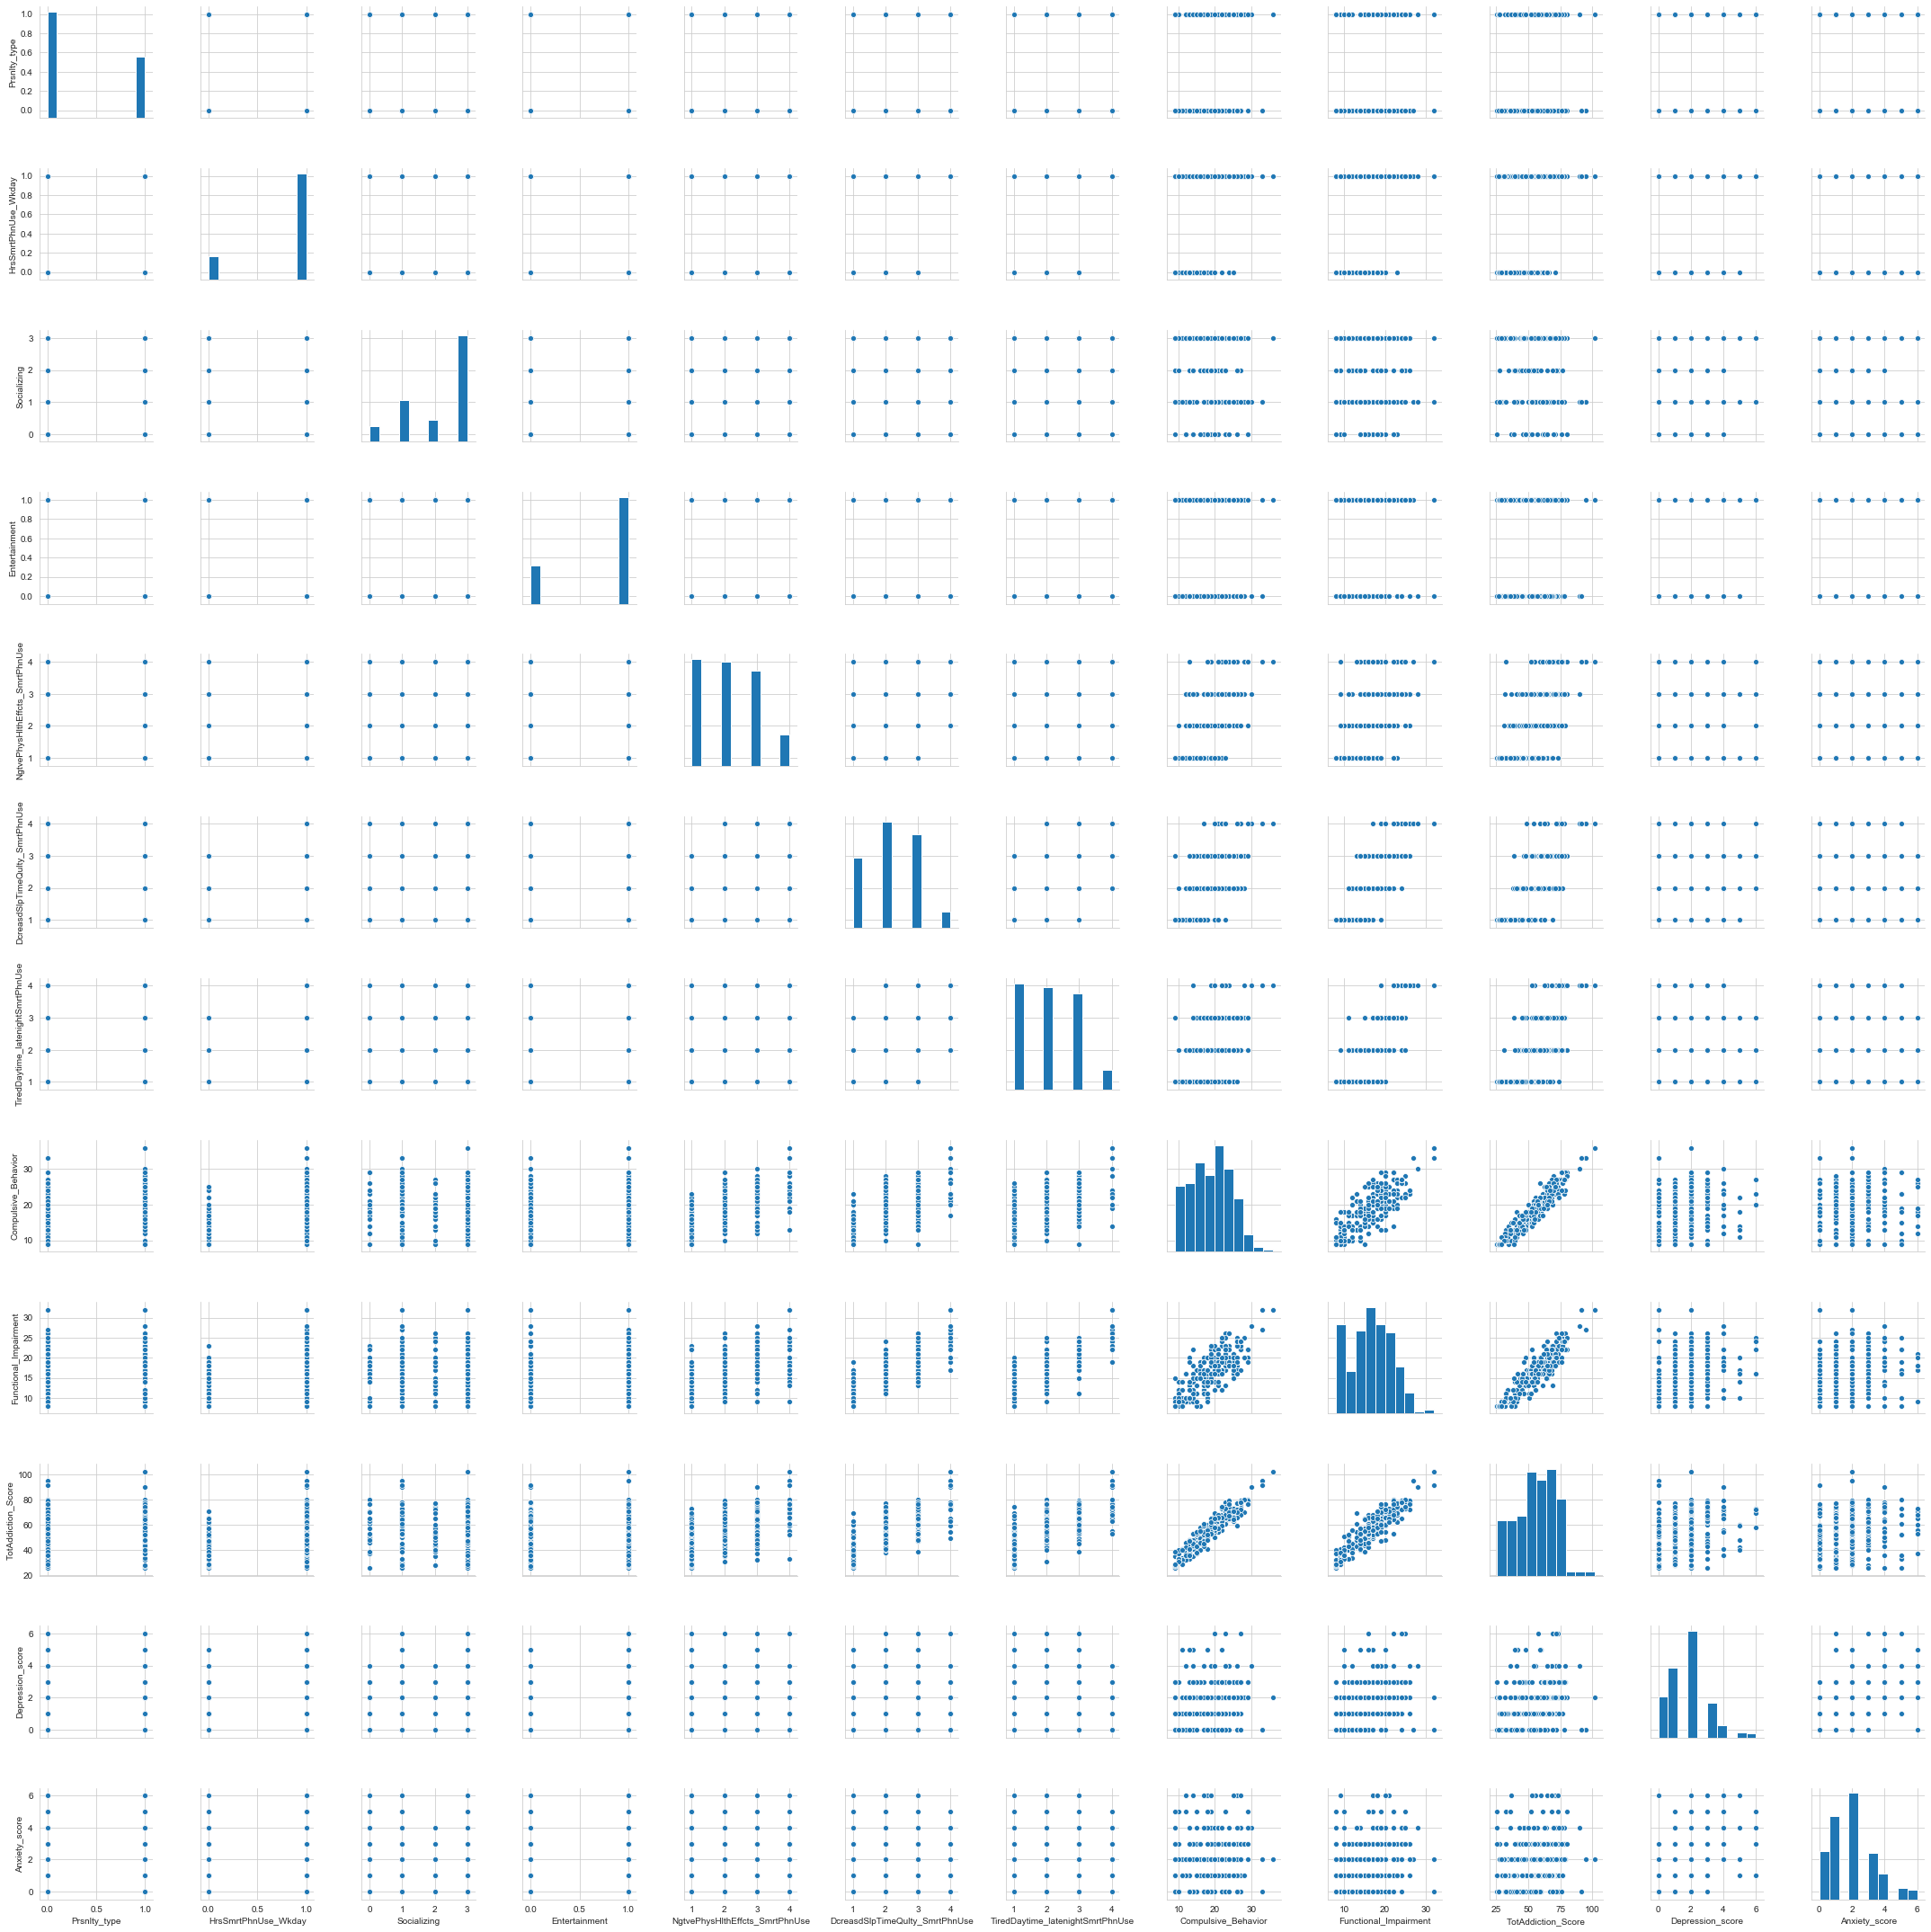

In [16]:
sns.set_style('whitegrid')
sns.pairplot(df)

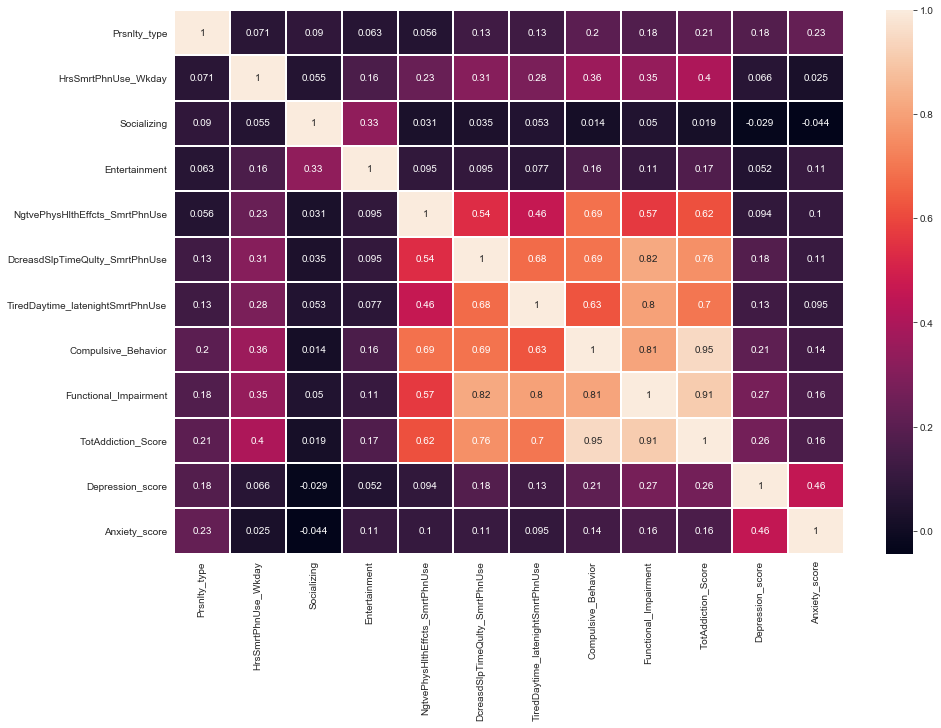

In [17]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True,linewidths=1, linecolor='white',)

## Training a Linear Regression Model

### X and y arrays

In [20]:
df.columns

Index(['Prsnlty_type', 'HrsSmrtPhnUse_Wkday', 'Socializing', 'Entertainment',
       'NgtvePhysHlthEffcts_SmrtPhnUse', 'DcreasdSlpTimeQulty_SmrtPhnUse',
       'TiredDaytime_latenightSmrtPhnUse', 'Compulsive_Behavior',
       'Functional_Impairment', 'TotAddiction_Score', 'Depression_score',
       'Anxiety_score'],
      dtype='object')

In [21]:
X = df[['Prsnlty_type', 'HrsSmrtPhnUse_Wkday', 'Socializing', 'Entertainment',
       'NgtvePhysHlthEffcts_SmrtPhnUse', 'DcreasdSlpTimeQulty_SmrtPhnUse',
       'TiredDaytime_latenightSmrtPhnUse', 'Compulsive_Behavior',
       'Functional_Impairment', 'TotAddiction_Score']]
y = df['Depression_score']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Creating and Training the Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()

In [26]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation


In [27]:
# print the intercept
print(lm.intercept_)

0.7176371193622322


In [28]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Prsnlty_type,0.305624
HrsSmrtPhnUse_Wkday,-0.035488
Socializing,-0.099924
Entertainment,-0.099565
NgtvePhysHlthEffcts_SmrtPhnUse,-0.135104
DcreasdSlpTimeQulty_SmrtPhnUse,-0.157597
TiredDaytime_latenightSmrtPhnUse,-0.162383
Compulsive_Behavior,-0.100312
Functional_Impairment,0.046366
TotAddiction_Score,0.060579


## Predictions from our Model


In [29]:
predictions = lm.predict(X_test)

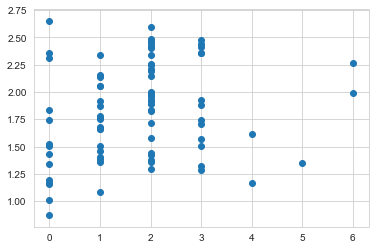

In [30]:
plt.scatter(y_test,predictions)

**Residual Histogram**

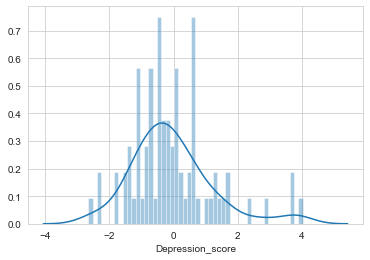

In [31]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics

In [32]:
from sklearn import metrics

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.9439983953367594
MSE: 1.6188887820598687
RMSE: 1.2723556036186852
